In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
#optimum parameter choosing 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import pickle
import os 
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('D:\\MACHINE LEARNING\\acmegrade\\Churn_Modelling.csv')
df.head

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

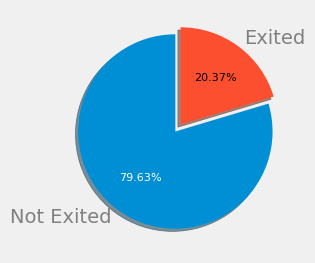

In [6]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

In [7]:
print (df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


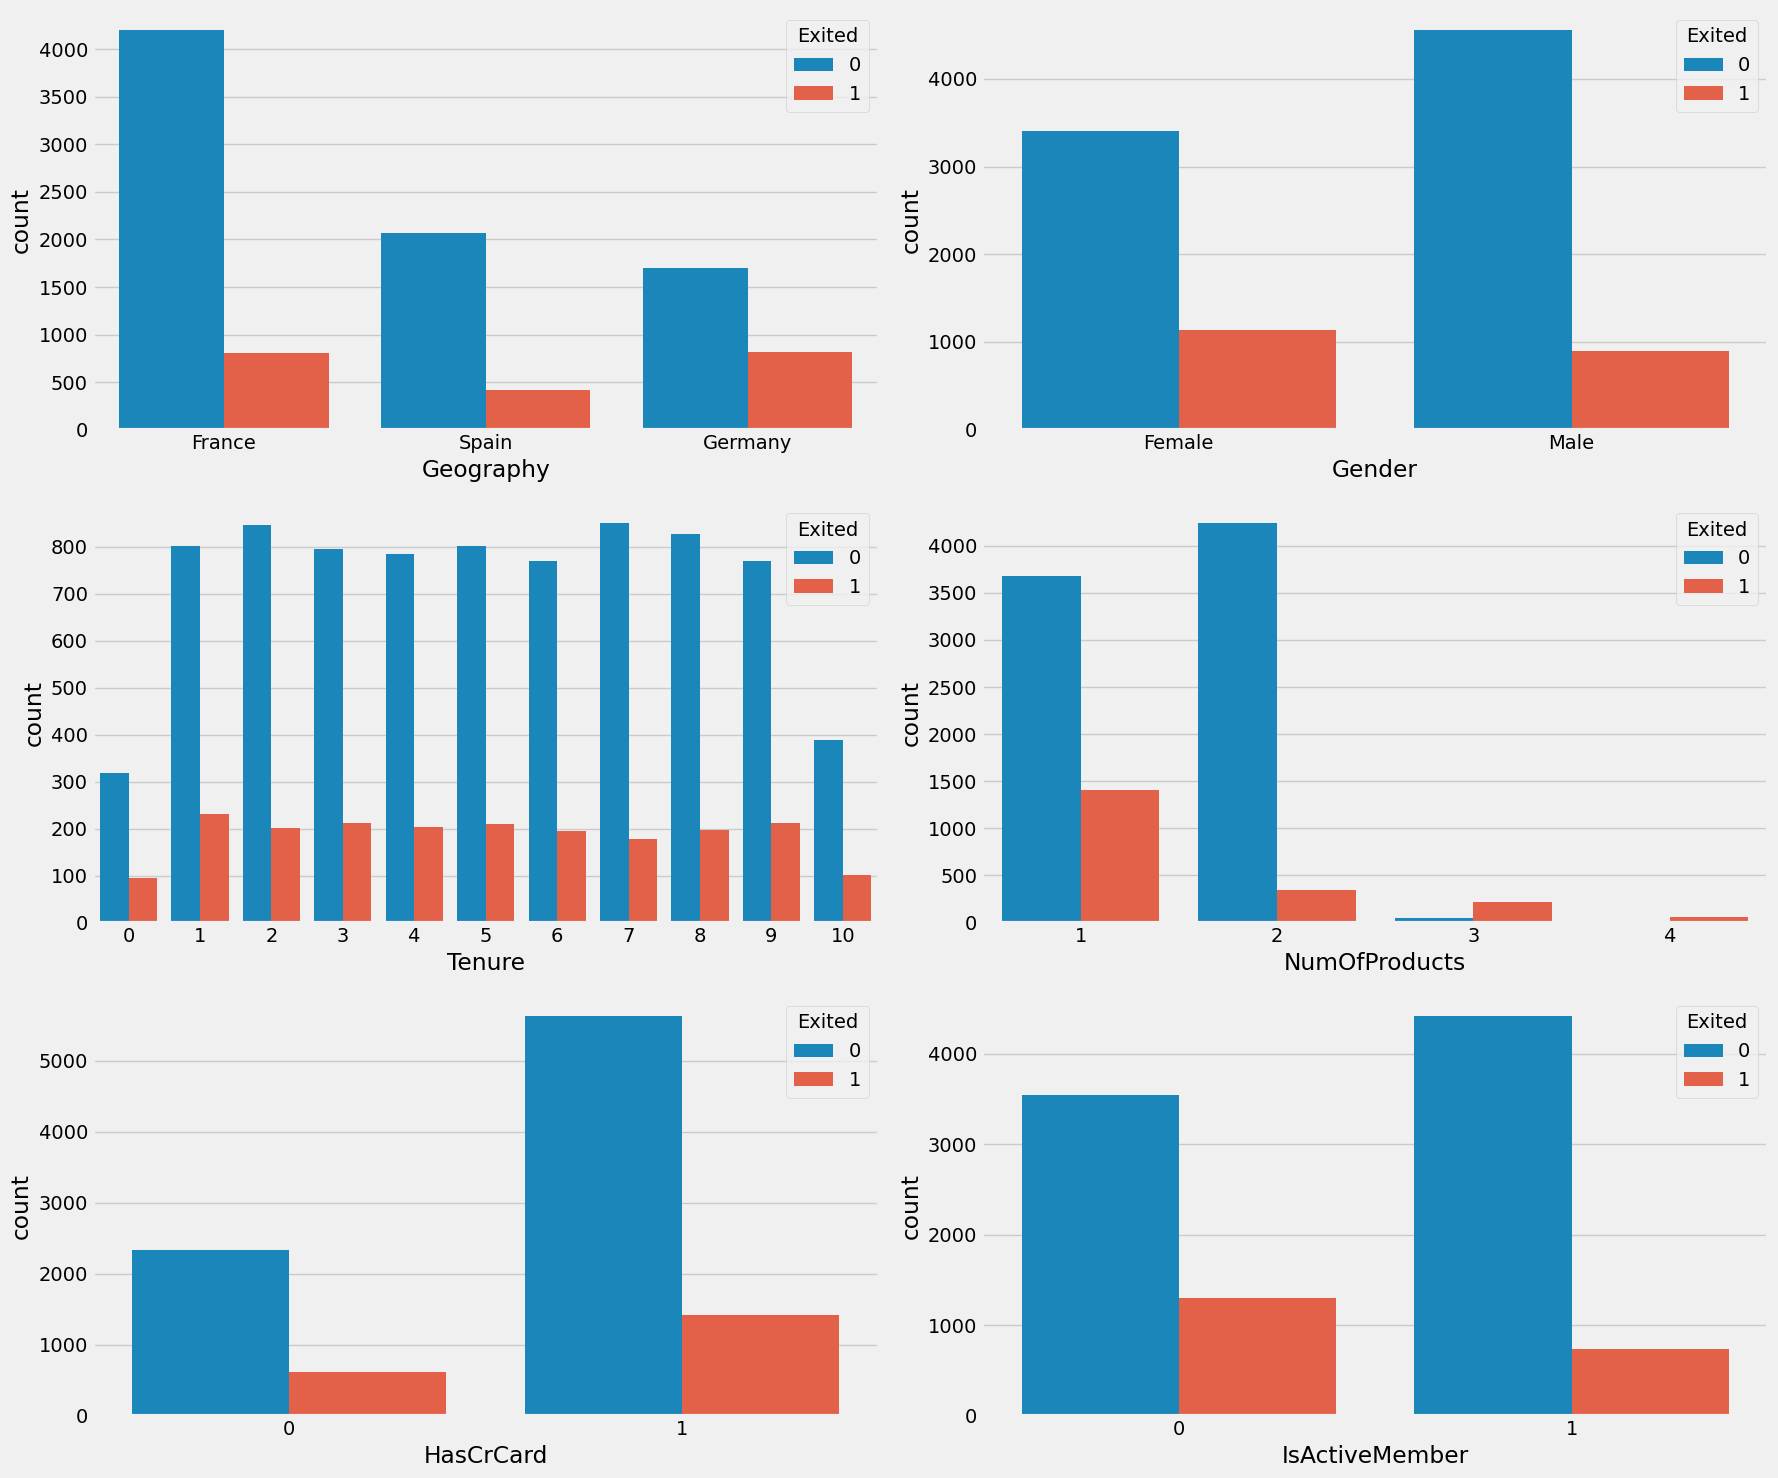

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

sns.countplot(x='Geography', hue='Exited', data=df, ax=ax[0, 0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=ax[0, 1])
sns.countplot(x='Tenure', hue='Exited', data=df, ax=ax[1, 0])
sns.countplot(x='NumOfProducts', hue='Exited', data=df, ax=ax[1, 1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=ax[2, 0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=ax[2, 1])

plt.tight_layout()
plt.show()


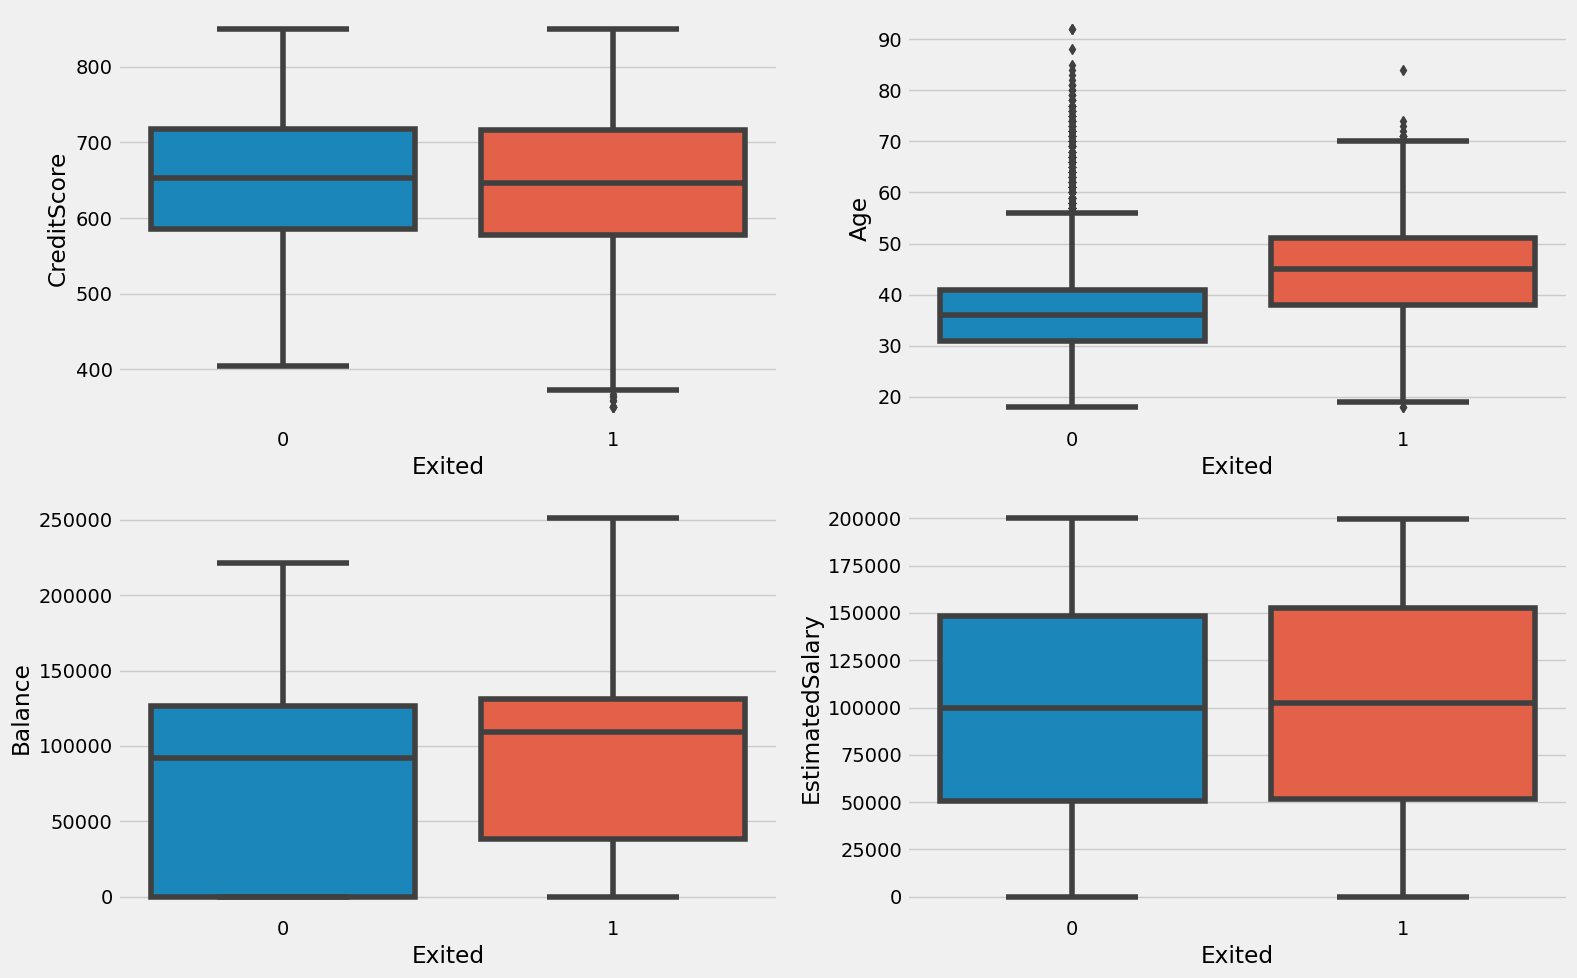

In [9]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])

plt.tight_layout()
plt.show()

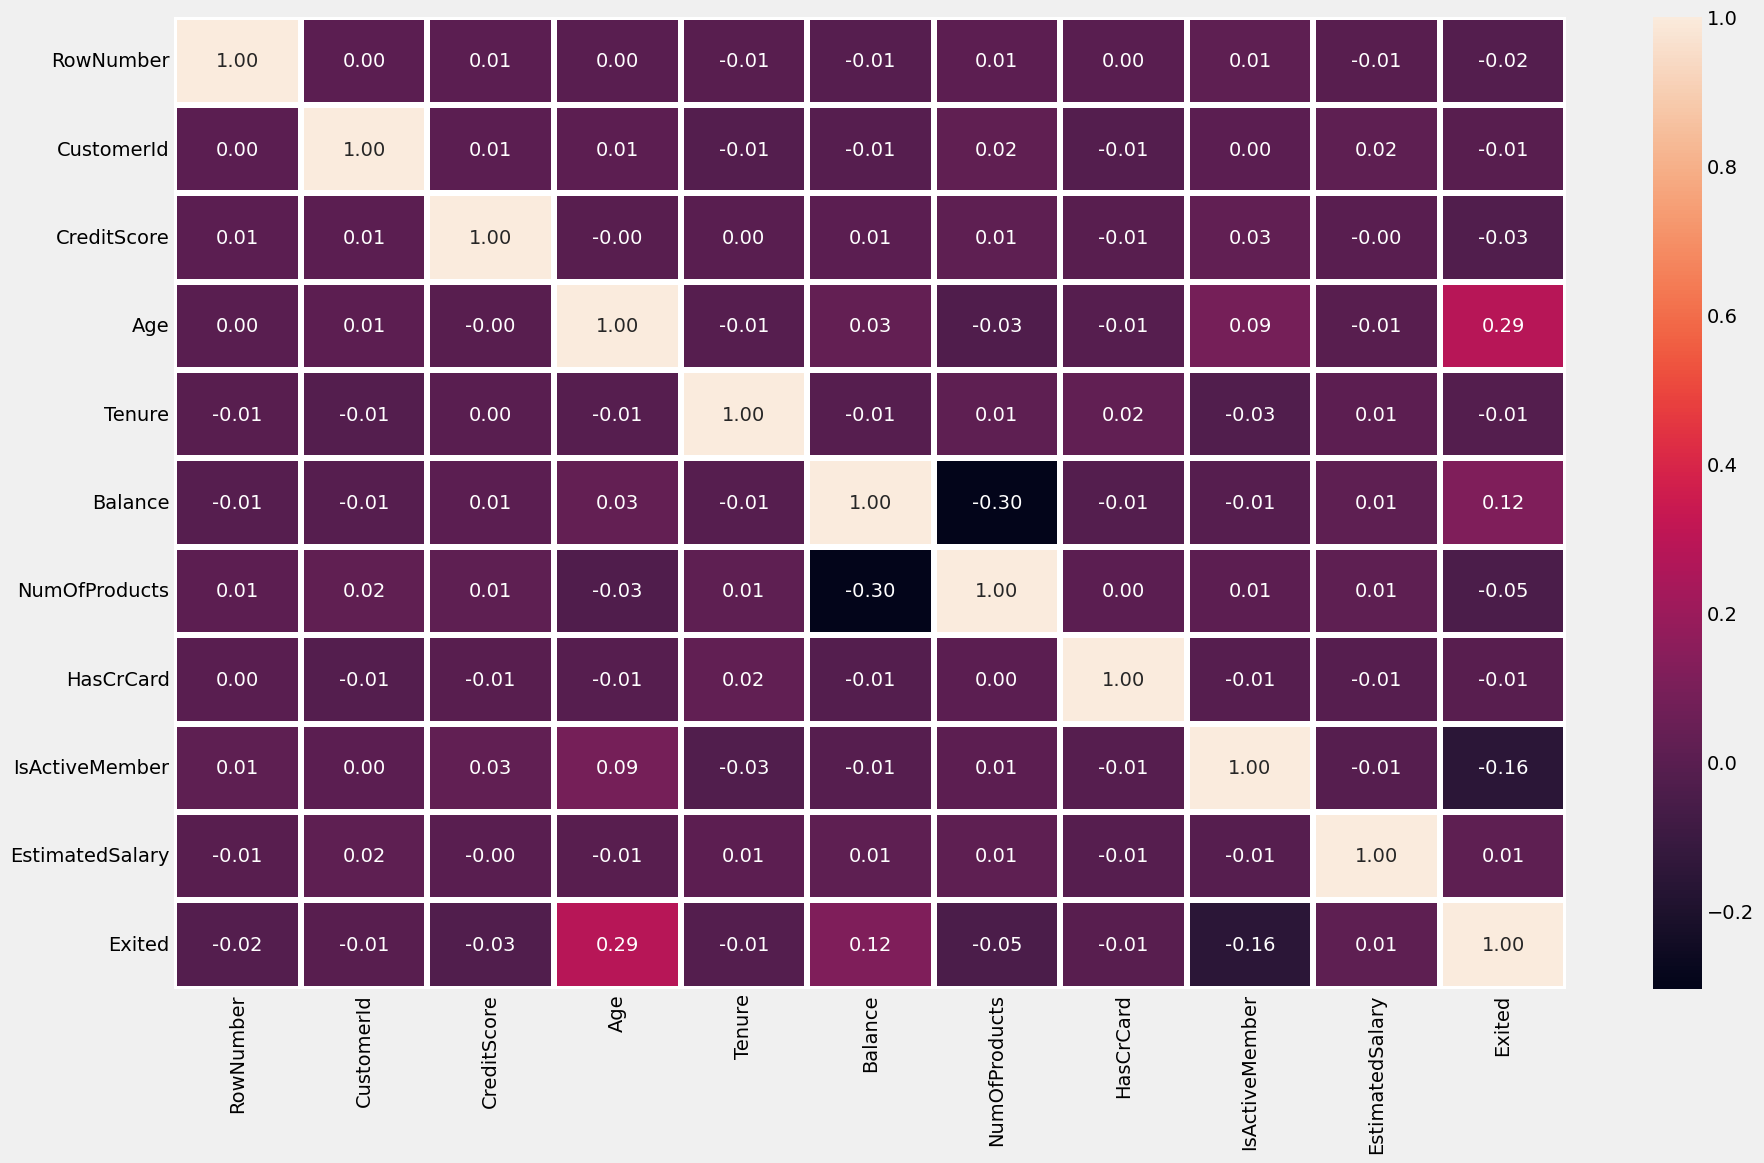

In [10]:
plt.figure(figsize = (20, 12))

corr = df.corr()

sns.heatmap(corr, linewidths = 4, annot = True, fmt = ".2f")
plt.show()

In [11]:
# dropping useless columns 

df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
print (df.groupby('Geography').size())

Geography
France     5014
Germany    2509
Spain      2477
dtype: int64


In [14]:
print (df.groupby('Gender').size())

Gender
Female    4543
Male      5457
dtype: int64


In [15]:
df['Geography'] = df['Geography']. astype('category')
df['Geography'] = df['Geography'].cat.codes

In [16]:
df['Gender'] = df['Gender']. astype('category')
df['Gender'] = df['Gender'].cat.codes

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df.dtypes

CreditScore          int64
Geography             int8
Gender                int8
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [19]:
x = df.iloc[:,1:10].values
print (x)

[[0.0000000e+00 0.0000000e+00 4.2000000e+01 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [2.0000000e+00 0.0000000e+00 4.1000000e+01 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [0.0000000e+00 0.0000000e+00 4.2000000e+01 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [0.0000000e+00 0.0000000e+00 3.6000000e+01 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [1.0000000e+00 1.0000000e+00 4.2000000e+01 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [0.0000000e+00 0.0000000e+00 2.8000000e+01 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [20]:
y=df.iloc[:,10].values
print(y)

[1 0 1 ... 1 1 0]


In [21]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x = sc_x.fit_transform(x)
print (x)

[[-0.90188624 -1.09598752  0.29351742 ...  0.64609167  0.97024255
   0.02188649]
 [ 1.51506738 -1.09598752  0.19816383 ... -1.54776799  0.97024255
   0.21653375]
 [-0.90188624 -1.09598752  0.29351742 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [-0.90188624 -1.09598752 -0.27860412 ... -1.54776799  0.97024255
  -1.00864308]
 [ 0.30659057  0.91241915  0.29351742 ...  0.64609167 -1.03067011
  -0.12523071]
 [-0.90188624 -1.09598752 -1.04143285 ...  0.64609167 -1.03067011
  -1.07636976]]


In [22]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [23]:
def FitModel (X,Y, algo_name , algorithm, gridSearchParams, cv):
    np.random.seed(10)
    x_train, x_test, y_train, y_test = train_test_split (X,Y,test_size = 0.2)
    
    # Find the Parameters , then choose best parameters 

    grid = GridSearchCV(estimator = algorithm, param_grid = gridSearchParams,
                        cv = cv, scoring = 'accuracy', verbose = 1 , n_jobs = -1 )
    
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict (x_test)
    cm = confusion_matrix (y_test,pred)
    
    print (pred)
    pickle.dump(grid_result,open(algo_name,'wb'))
    
    print ('Best Params :', best_params)
    print ('Classification Report:',classification_report(y_test,pred))
    print ('Accuracy Score', (accuracy_score(y_test,pred)))
    print ('Confusion Matrix :\n',cm)

In [24]:
param = {
            'C': [0.1,1,100,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }

FitModel (x,y,'SVC',SVC(), param, cv =10)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[0 0 1 ... 0 0 1]
Best Params : {'C': 100, 'gamma': 0.005}
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1578
           1       0.84      0.37      0.51       422

    accuracy                           0.85      2000
   macro avg       0.85      0.67      0.71      2000
weighted avg       0.85      0.85      0.83      2000

Accuracy Score 0.8515
Confusion Matrix :
 [[1548   30]
 [ 267  155]]


In [25]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (x,y,'XGBoost', XGBClassifier(),param, cv = 10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 0 1 ... 0 0 1]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1578
           1       0.71      0.46      0.56       422

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.73      2000
weighted avg       0.83      0.85      0.83      2000

Accuracy Score 0.8465
Confusion Matrix :
 [[1497   81]
 [ 226  196]]


In [26]:
param = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  
}

FitModel (x,y,'Gaussian Naive Bayes', GaussianNB(),param, cv = 10)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[0 0 0 ... 0 0 0]
Best Params : {'var_smoothing': 1e-09}
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.98      0.90      1578
           1       0.75      0.22      0.33       422

    accuracy                           0.82      2000
   macro avg       0.78      0.60      0.61      2000
weighted avg       0.81      0.82      0.78      2000

Accuracy Score 0.819
Confusion Matrix :
 [[1547   31]
 [ 331   91]]
